ЛАБОРАТОРНАЯ РАБОТА ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #2
 
1. Зашумить изображение при помощи шума гаусса, постоянного шума.
-----------------------------------------------------------------


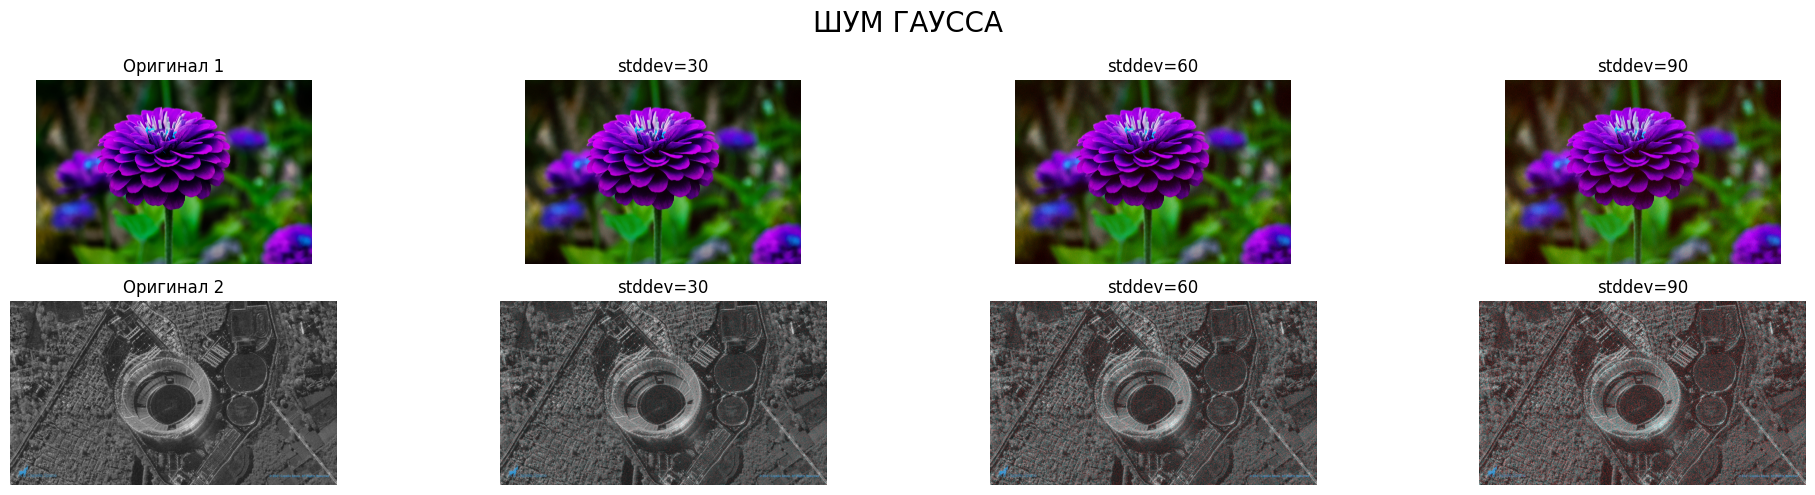

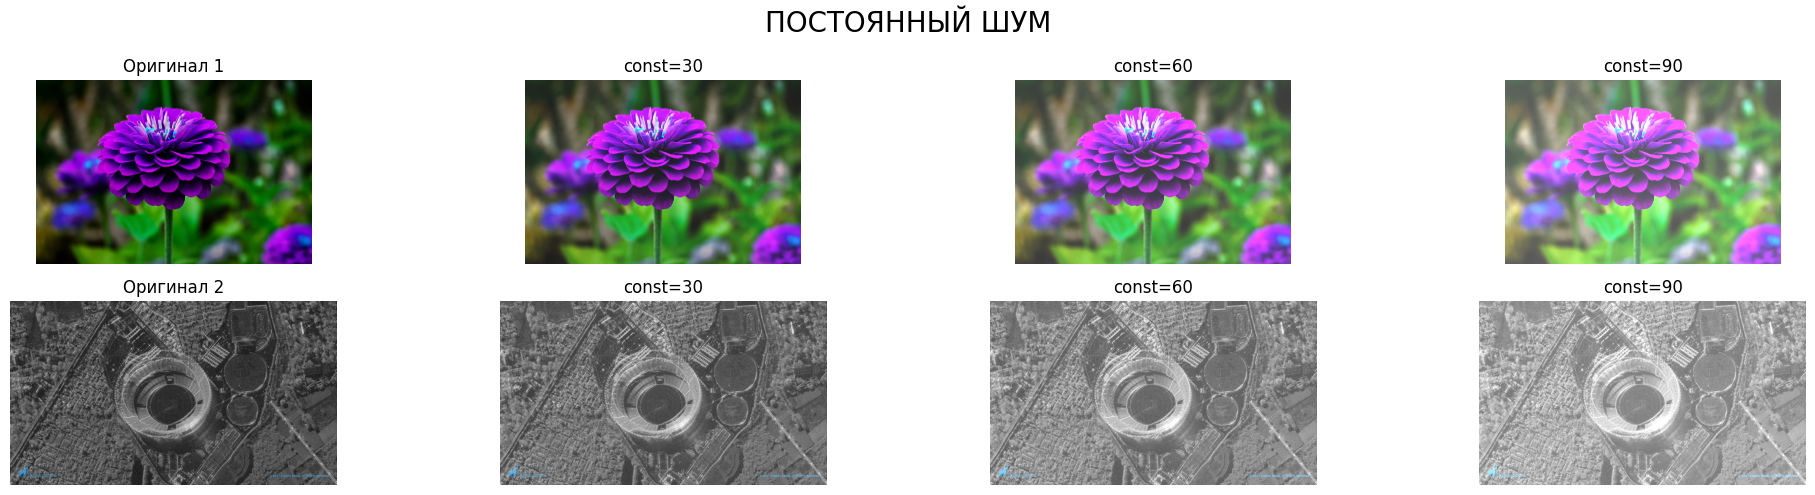

 
 
2. Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр,
 фильтр нелокальных средних с различными параметрами.
----------------------------------------------------------------------------------------
1 строка - оригиналы изображений 
2 строка - медианный фильтр 
3 строка - фильтр Гаусса 
4 строка - билатеральный фильтр 
5 строка - фильтр нелокальных средних


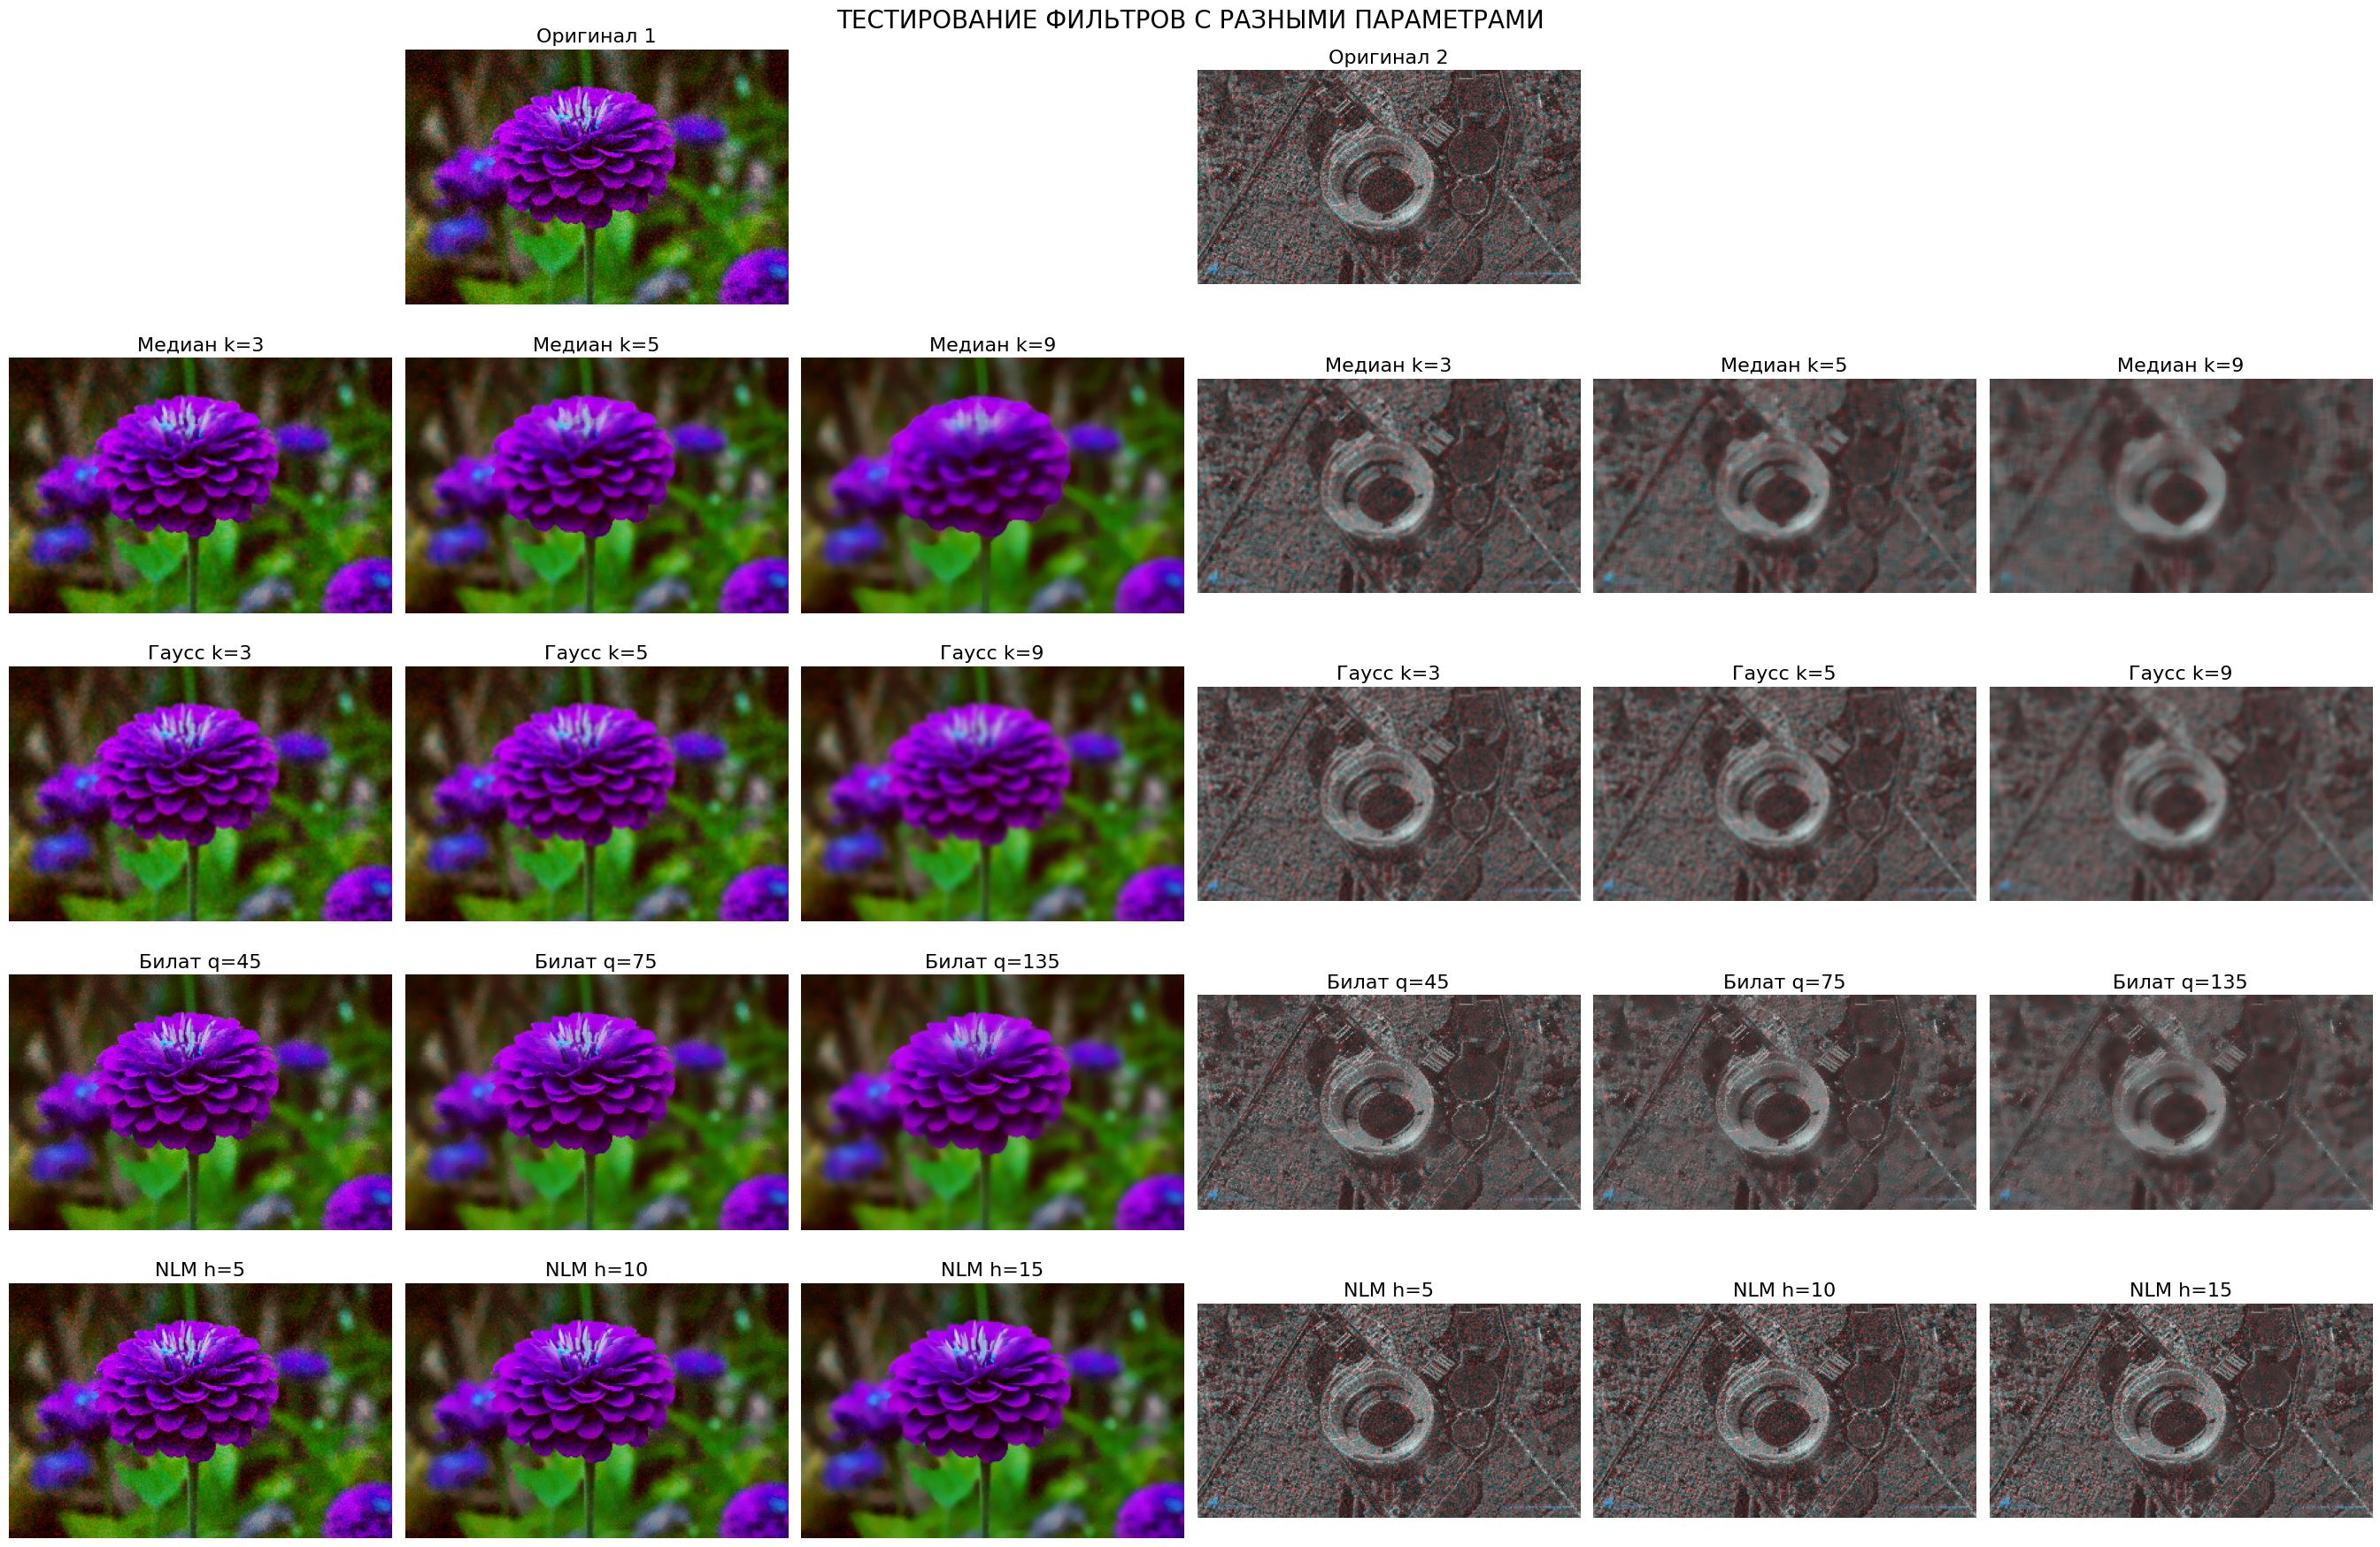

 
 
3. Выяснить, какой фильтр показал лучший результат фильтрации шума.
----------------------------------------------------------------------------------------
ОТВЕТ: Лучший результат показал фильтр нелокальных средних, так как он эффективнее всего убирает использованный нами шум Гаусса на картинках при этом лучше сохраняет детали изображения без сильного размытия.
 


In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity
import os

print("="*51)
print("ЛАБОРАТОРНАЯ РАБОТА ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #2")
print("="*51)
print(" ")
img = cv2.imread('img.jpg')
img_wb = cv2.imread('img_wb.jpg')


###1 ЗАДАНИЕ : Зашумить изображение при помощи шума гаусса, постоянного шума.
print("1. Зашумить изображение при помощи шума гаусса, постоянного шума.")
print("-"*65)

stddev = [30, 60, 90]
mean = 0

def gauss(x, mean, sigma):
    noise = np.zeros(x.shape, dtype=np.float32)
    cv2.randn(noise, mean, sigma)
    noisy_image = x.astype(np.float32) + noise     # Добавляем шум к исходному изображению
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)

def constant(image, constant_value):
    noisy_image = image.astype(np.float32) + constant_value
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)


plt.figure(figsize=(20, 5))
# Оригиналы
plt.subplot(2, 4, 1)
plt.imshow(img)
plt.title("Оригинал 1")
plt.axis("off")

plt.subplot(2, 4, 5)
plt.imshow(img_wb)
plt.title("Оригинал 2")
plt.axis("off")

for i in range(len(stddev)):
    # шум для img
    ng1 = gauss(img, mean, stddev[i])
    plt.subplot(2, 4, i+2)
    plt.imshow(ng1, cmap="gray")
    plt.title(f"stddev={stddev[i]}")
    plt.axis('off')

    # шум для img_wb
    ng2 = gauss(img_wb, mean, stddev[i])
    plt.subplot(2, 4, i+6)
    plt.imshow(ng2, cmap="gray")
    plt.title(f"stddev={stddev[i]}")
    plt.axis('off')

#для 2 задания
img_n1 = ng1
img_n2 = ng2

plt.suptitle("ШУМ ГАУССА", fontsize=20)
plt.tight_layout()
plt.show()
print(" ")


plt.figure(figsize=(20, 5))
# Оригиналы
plt.subplot(2, 4, 1)
plt.imshow(img)
plt.title("Оригинал 1")
plt.axis("off")

plt.subplot(2, 4, 5)
plt.imshow(img_wb)
plt.title("Оригинал 2")
plt.axis("off")

for i in range(len(stddev)):
    # постоянный шум для img
    ng1 = constant(img, stddev[i])
    plt.subplot(2, 4, i+2)
    plt.imshow(ng1)
    plt.title(f"const={stddev[i]}")
    plt.axis('off')

    # постоянный шум для img_wb
    ng2 = constant(img_wb, stddev[i])
    plt.subplot(2, 4, i+6)
    plt.imshow(ng2, cmap="gray")
    plt.title(f"const={stddev[i]}")
    plt.axis('off')

plt.suptitle("ПОСТОЯННЫЙ ШУМ", fontsize=20)
plt.tight_layout()
plt.show()
print(" ")
print(" ")



###2 ЗАДАНИЕ : Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
print("2. Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр,\n фильтр нелокальных средних с различными параметрами.")
print("-"*88)
print("1 строка - оригиналы изображений \n2 строка - медианный фильтр \n3 строка - фильтр Гаусса \n4 строка - билатеральный фильтр \n5 строка - фильтр нелокальных средних")

plt.figure(figsize=(27, 18))

def resize_for_processing(image, max_size=300):
    h, w = image.shape[:2]
    if max(h, w) > max_size:
        scale = max_size / max(h, w)
        new_h, new_w = int(h * scale), int(w * scale)
        return cv2.resize(image, (new_w, new_h))
    return image

# Подготавливаем изображения
img_small = resize_for_processing(img_n1)
img_wb_small = resize_for_processing(img_n2)

# Приводим к uint8
if img_small.dtype != 'uint8':
    img_small = (img_small * 255).astype('uint8')
if img_wb_small.dtype != 'uint8':
    img_wb_small = (img_wb_small * 255).astype('uint8')

# Параметры для фильтров (только нечетные для медианного фильтра)
k = [3, 5, 9]

# Первая строка - оригиналы
plt.subplot(5, 6, 2)
plt.imshow(img_small)
plt.title("Оригинал 1", fontsize=16)
plt.axis("off")

plt.subplot(5, 6, 4)
plt.imshow(img_wb_small, cmap="gray")
plt.title("Оригинал 2", fontsize=16)
plt.axis("off")

# Вторая строка - медианный фильтр
for i in range(len(k)):
    m1 = cv2.medianBlur(img_small, k[i])
    plt.subplot(5, 6, i+7)
    plt.imshow(m1)
    plt.title(f"Медиан k={k[i]}", fontsize=16)
    plt.axis('off')

    m2 = cv2.medianBlur(img_wb_small, k[i])
    plt.subplot(5, 6, i+10)
    plt.imshow(m2, cmap="gray")
    plt.title(f"Медиан k={k[i]}", fontsize=16)
    plt.axis('off')

# Третья строка - фильтр Гаусса
for i in range(len(k)):
    g1 = cv2.GaussianBlur(img_small, (k[i], k[i]), 0)
    plt.subplot(5, 6, i+13)
    plt.imshow(g1)
    plt.title(f"Гаусс k={k[i]}", fontsize=16)
    plt.axis('off')

    g2 = cv2.GaussianBlur(img_wb_small, (k[i], k[i]), 0)
    plt.subplot(5, 6, i+16)
    plt.imshow(g2, cmap="gray")
    plt.title(f"Гаусс k={k[i]}", fontsize=16)
    plt.axis('off')

# Четвертая строка - билатеральный фильтр
for i in range(len(k)):
    b1 = cv2.bilateralFilter(img_small, 9, k[i]*15, k[i]*15)
    plt.subplot(5, 6, i+19)
    plt.imshow(b1)
    plt.title(f"Билат q={k[i]*15}", fontsize=16)
    plt.axis('off')

    b2 = cv2.bilateralFilter(img_wb_small, 9, k[i]*15, k[i]*15)
    plt.subplot(5, 6, i+22)
    plt.imshow(b2, cmap="gray")
    plt.title(f"Билат q={k[i]*15}", fontsize=16)
    plt.axis('off')

# Пятая строка - фильтр нелокальных средних
nl_params = [5, 10, 15]  # h параметры для NLM
for i in range(len(k)):
    # Для цветного изображения - используем более быстрые параметры
    f1 = cv2.fastNlMeansDenoisingColored(img_small, None, nl_params[i], nl_params[i], 3, 7)
    plt.subplot(5, 6, i+25)
    plt.imshow(f1)
    plt.title(f"NLM h={nl_params[i]}", fontsize=16)
    plt.axis('off')

    # Для ч/б изображения
    f2 = cv2.fastNlMeansDenoising(img_wb_small, None, nl_params[i], 3, 7)
    plt.subplot(5, 6, i+28)
    plt.imshow(f2, cmap="gray")
    plt.title(f"NLM h={nl_params[i]}", fontsize=16)
    plt.axis('off')

plt.suptitle("ТЕСТИРОВАНИЕ ФИЛЬТРОВ С РАЗНЫМИ ПАРАМЕТРАМИ", fontsize=20)
plt.tight_layout()
plt.show()
print(" ")
print(" ")



###3 ЗАДАНИЕ : Выяснить, какой фильтр показал лучший результат фильтрации шума.
print("3. Выяснить, какой фильтр показал лучший результат фильтрации шума.")
print("-"*88)
print("ОТВЕТ: Лучший результат показал фильтр нелокальных средних, так как он эффективнее всего убирает использованный нами шум Гаусса на картинках при этом лучше сохраняет детали изображения без сильного размытия.")
print(" ")